In [ ]:
import zipfile
import os

zip_path = "dataset.zip"  # ← change this to your actual zip file name
extract_to = "dataset"         # ← this is the folder it will unzip into

# Make sure the folder exists
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(" Unzipped successfully!")

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

# Use an explicit Input layer to define the input shape
model.add(Input(shape=(64, 64, 3)))  # Define input shape here

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model built and compiled!")



Model built and compiled!


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the model
model = Sequential([
    Input(shape=(64, 64, 3)),  # Explicitly define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Blocked vs NotBlocked)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to check its architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle  # To save the history

# === Paths to dataset ===
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

# === Data Generators ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(64, 64), batch_size=32, class_mode='binary'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_path, target_size=(64, 64), batch_size=32, class_mode='binary'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_path, target_size=(64, 64), batch_size=32, class_mode='binary'
)

# === Build Model ===
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === Train Model ===
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=25
)

# === Save Model & History ===
model.save("cnn_model.h5")

with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

# === Evaluate on Test Data ===
loss, acc = model.evaluate(test_generator)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")


Found 6752 images belonging to 2 classes.
Found 255 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Epoch 1/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 116s 540ms/step - accuracy: 0.9109 - loss: 0.2491 - val_accuracy: 0.9804 - val_loss: 0.0432
Epoch 2/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 55s 261ms/step - accuracy: 0.9788 - loss: 0.0667 - val_accuracy: 0.9765 - val_loss: 0.0307
Epoch 3/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 56s 266ms/step - accuracy: 0.9803 - loss: 0.0555 - val_accuracy: 0.9882 - val_loss: 0.0245
Epoch 4/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 55s 262ms/step - accuracy: 0.9824 - loss: 0.0527 - val_accuracy: 0.9922 - val_loss: 0.0195
Epoch 5/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 58s 272ms/step - accuracy: 0.9859 - loss: 0.0380 - val_accuracy: 0.9882 - val_loss: 0.0200
Epoch 6/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 60s 282ms/step - accuracy: 0.9874 - loss: 0.0355 - val_accuracy: 0.9961 - val_loss: 0.0148
Epoch 7/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 60s 283ms/step - accuracy: 0.9904 - loss: 0.0275 -

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0098 

Test Loss: 0.0101, Test Accuracy: 1.0000


In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image and prepare it for prediction

img_path = 'dataset/valid/NotBlocked/Not_Blocked-166-_png.rf.d09dbe49b0f7b6c01acb4cc1496500d3.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(64, 64))  # Resize to the same size as during training
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size

# Normalize the image (as we did during training)
img_array = img_array / 255.0

# Make a prediction
prediction = model.predict(img_array)

print("Prediction:", "Not Blocked" if prediction[0] > 0.5 else "Blocked")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Prediction: Not Blocked


In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image and prepare it for prediction
img_path = 'dataset/test/Blocked/Blocked-98-_png.rf.7c0c80a4d698497e834b8d38759a7c7a.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(64, 64))  # Resize to the same size as during training
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size

# Normalize the image (as we did during training)
img_array = img_array / 255.0

# Make a prediction
prediction = model.predict(img_array)

print("Prediction:", "Not Blocked" if prediction[0] > 0.5 else "Blocked")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: Blocked


In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image and prepare it for prediction
img_path = 'dataset/test/NotBlocked/NotBlocked-8-_png.rf.d51161ca88a92be44260589619b03469.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(64, 64))  # Resize to the same size as during training
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size

# Normalize the image (as we did during training)
img_array = img_array / 255.0

# Make a prediction
prediction = model.predict(img_array)

print("Prediction:", "Not Blocked" if prediction[0] > 0.5 else "Blocked")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: Not Blocked


In [44]:
model.save("cnn_model.h5")

In [29]:
import json

# Save class indices (e.g., {'Blocked': 0, 'NotBlocked': 1})
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)



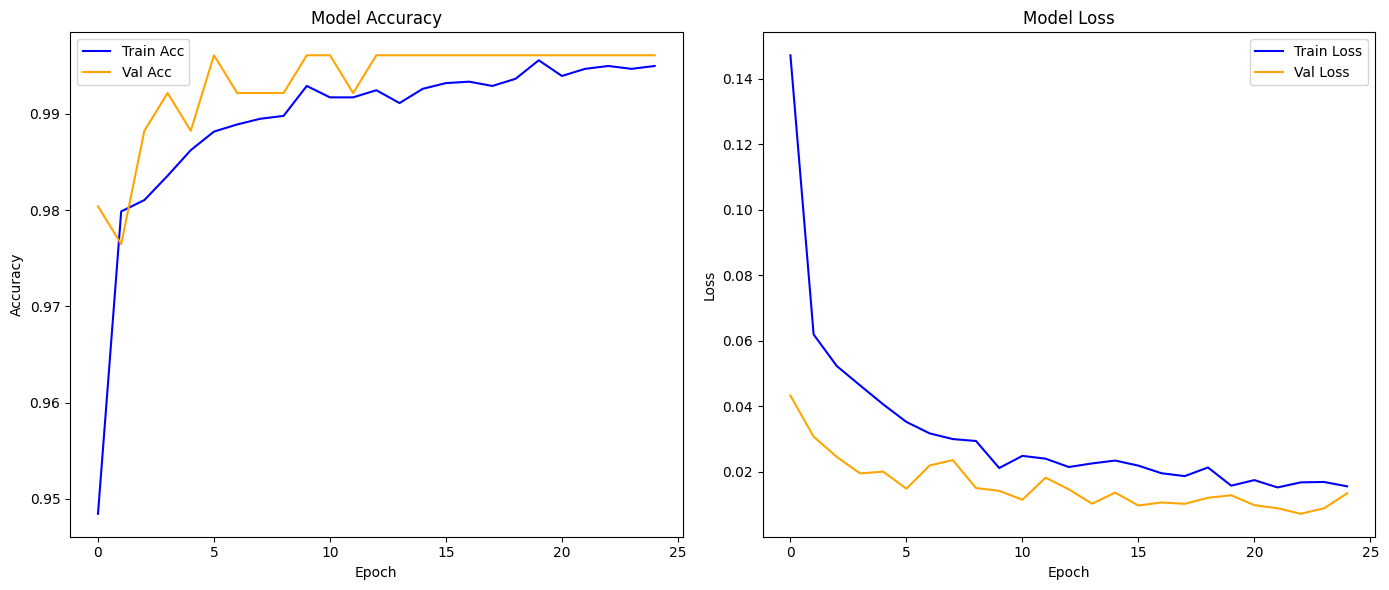

In [7]:
import matplotlib.pyplot as plt
import pickle

# === Load Training History ===
with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)

# === Plot Accuracy & Loss ===
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Acc', color='blue')
plt.plot(history['val_accuracy'], label='Val Acc', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss', color='blue')
plt.plot(history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
plt.show()


In [14]:
model.save('blocked_vs_not_blocked_model.keras')